# **Cifar10 Classification**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

이미지 데이터 확인
* 참고(https://jjeongil.tistory.com/953)

In [ ]:
from keras.datasets import cifar10

(X_train_full, y_train_full) , (X_test, y_test) = cifar10.load_data()

print("X_train_full:",X_train_full.shape)
print("y_train_full:",y_train_full.shape)
print()
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train_full: (50000, 32, 32, 3)
y_train_full: (50000, 1)

X_test: (10000, 32, 32, 3)
y_test: (10000, 1)


* 훈련 데이터는 keras가 제공하는 방식을 이용해서 불러왔고, 50000개의 샘플, 32x32 사이즈, 3채널(컬러이미지)인 것을 확인함  
* 테스트 데이터는 10000개의 샘플로 나눠짐

## Explore Data

### X 데이터 확인

In [ ]:
X_train_full[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

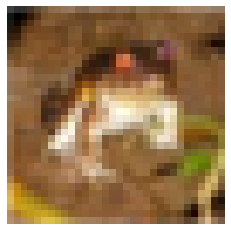

In [ ]:
# X_train_full의 첫번째 이미지만 출력

plt.imshow(X_train_full[0])
plt.axis('off')
plt.show()

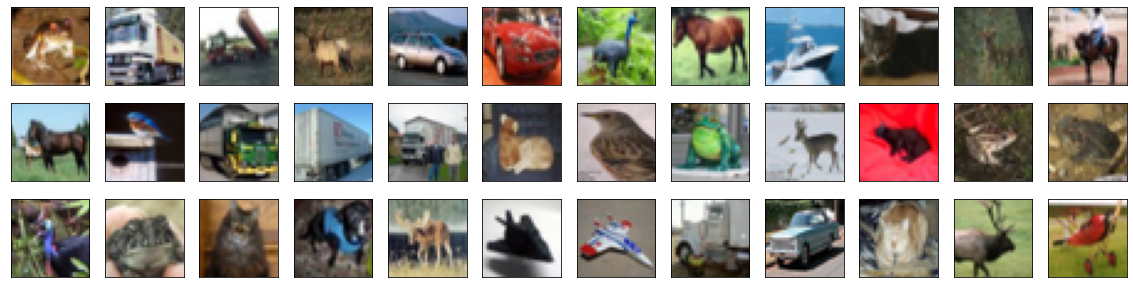

In [ ]:
# 36번까지의 X_train_full 이미지 출력

fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(X_train_full[i])

### y 데이터 확인

In [ ]:
print(y_train_full.flatten())
print()
print('y_train 최솟값:',min(y_train_full))
print('y_train 최대값',max(y_train_full))

[6 9 9 ... 9 1 1]

y_train 최솟값: [0]
y_train 최대값 [9]


▶ y는 0~9로 이루어진 데이터

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print(y_train_full[0])   #  첫번째 y_train 그림의 레이블 숫자
print(class_names[y_train_full.flatten()[0]])   # 첫번째 y_train 그림의 레이블명

[6]
frog


레이블 0부터 9 순으로 class명 정의    
(class명 참고: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data )

### X와 y 같이 확인

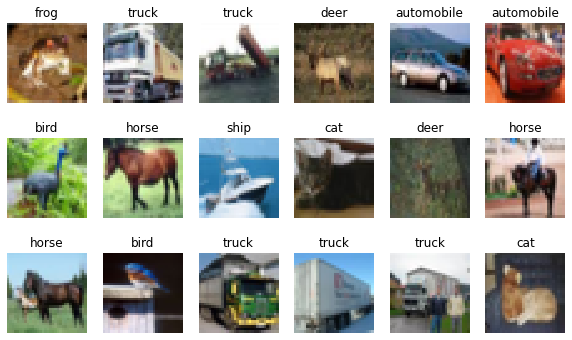

In [ ]:
n_rows = 3
n_cols = 6
plt.figure(figsize = (10,6))
for i in range(n_rows):
  for j in range(n_cols):
    index = n_cols * i + j
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train_full[index], cmap = 'binary', interpolation = 'nearest')   # interpolation 함수: 해상도 증가
    plt.axis('off')
    plt.title(class_names[y_train_full.flatten()[index]], fontsize = 12)
plt.show()

* `interpolation = 'none'` : when a big image is scaled down
* `interplation = 'nearest'` : when a small image is scaled up (작은 이미지 해상도 증가)             
(https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html)
(https://steemit.com/kr-dev/@dj-on-steem/matplotlib-08-plot-main-imshow)

## Split into train & valid set 

In [ ]:
# X_train_full 및 y_train_full을 각각 훈련 데이터(train)과 검증 데이터(valid)로 나눈다. 
# 그 후, [0, 1] 값 범위 내에 값이 존재하도록 array 값을 255로 나누어서 표준화

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
print(X_train_full.shape)  # 나누기 전
print(X_valid.shape)       # 검증 데이터
print(X_train.shape)       # 훈련 데이터

(50000, 32, 32, 3)
(5000, 32, 32, 3)
(45000, 32, 32, 3)


In [ ]:
print(y_train_full.shape)  # 나누기 전
print(y_valid.shape)       # 검증 데이터
print(y_train.shape)       # 훈련 데이터

(50000, 1)
(5000, 1)
(45000, 1)


In [ ]:
print(X_test.shape)   # 테스트용
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


## 모델 훈련 (MLP) - RGB

이미지 모델링 시, CPU로 런타임 실행할 경우 시간이 매우 오래 걸림  
따라서 GPU로 실행하여 시간을 절약해야함   
* 코랩에서 GPU환경을 셋팅하는 방법 → https://m.blog.naver.com/demian7607/222043724449    
* 같은 코드에 대하여 CPU와 GPU환경에서 실행할 때의 속도 비교 코드 → https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=Y04m-jvKRDsJ  
> < About **`timeit`** >  
https://whitewing4139.tistory.com/156





In [ ]:
import tensorflow as tf 
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


▲ GPU환경 확인

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
import timeit

In [ ]:
# 고정 값 설정  (고정 해주는 것이 좋음)
import numpy as np
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

### try1: 은닉층 300-100-10

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),    # 초기값 설정
    keras.layers.Dense(300,activation = 'relu'),  # 첫번쨰 은닉층: dense(퍼셉트론) 300개, 활성화 함수는 relu
    keras.layers.Dense(100,activation = 'relu'),  # 두번쨰 은닉층: dense(퍼셉트론) 100개, 활성화 함수는 relu
    keras.layers.Dense(10,activation = 'softmax') # 출력층: dense(퍼셉트론) 10개, 활성화 함수는 softmax 
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


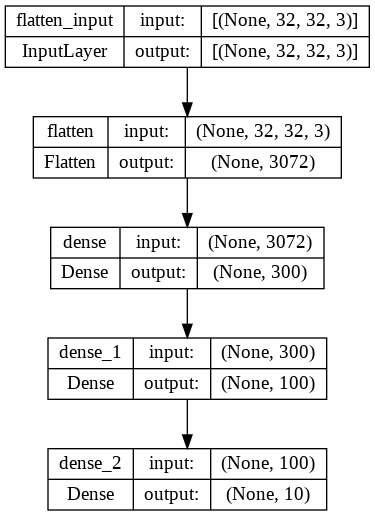

In [ ]:
keras.utils.plot_model(model,show_shapes = True)

In [ ]:
## tensorboard 시각화를 위한 log 지정
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "Mlp_300_100_10"
log_dir = "logs/seung_board/"
current_log_dir = log_dir + conf_name

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model_mlp_color_300_100_10.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model.compile(loss = 'sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])      # 모델 컴파일
  history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid), callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8971 - accuracy: 0.3186 - val_loss: 1.8524 - val_accuracy: 0.3262
Epoch 2/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7135 - accuracy: 0.3921 - val_loss: 1.9065 - val_accuracy: 0.3080
Epoch 3/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6348 - accuracy: 0.4207 - val_loss: 1.8245 - val_accuracy: 0.3334
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5789 - accuracy: 0.4388 - val_loss: 1.7845 - val_accuracy: 0.3818
Epoch 5/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5361 - accuracy: 0.4553 - val_loss: 1.6118 - val_accuracy: 0.4210
Epoch 6/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.4968 - accuracy: 0.4693 - val_loss: 1.5822 - val_accuracy: 0.4364
Epoch 7/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.4626 - accuracy: 0.4822 - val_loss: 1.5769 - val_accuracy:

* `Early_Stopping` & `ModelCheckpoint`  
https://3months.tistory.com/424

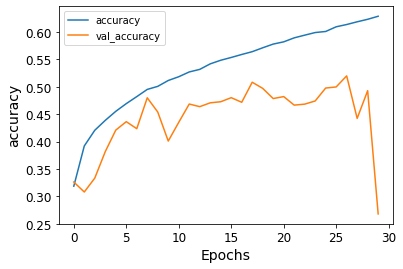

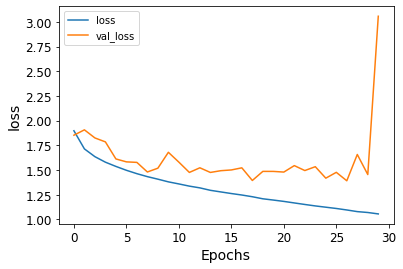

In [ ]:
# 성능 확인 그래프
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### try2: 은닉층 400-150-10

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "Mlp_400_150_10"
log_dir = "logs/seung_board/"
current_log_dir = log_dir + conf_name

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_mlp_400_150_10 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),    # 초기값 설정
    keras.layers.Dense(400,activation = 'relu'),  # 첫번쨰 은닉층: dense(퍼셉트론) 300개, 활성화 함수는 relu
    keras.layers.Dense(150,activation = 'relu'),  # 두번쨰 은닉층: dense(퍼셉트론) 100개, 활성화 함수는 relu
    keras.layers.Dense(10,activation = 'softmax') # 출력층: dense(퍼셉트론) 10개, 활성화 함수는 softmax 
])

model_mlp_400_150_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 400)               1229200   
                                                                 
 dense_1 (Dense)             (None, 150)               60150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 1,290,860
Trainable params: 1,290,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min',restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_mlp_400_150_10.h5", monitor='val_loss', mode='min', save_best_only=True) 
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_mlp_400_150_10.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])
  history = model_mlp_400_150_10.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 32)

Epoch 1/30
1407/1407 [==============================] - 5s 3ms/step - loss: 2.0796 - accuracy: 0.2571 - val_loss: 1.9475 - val_accuracy: 0.3116
Epoch 2/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.9102 - accuracy: 0.3308 - val_loss: 1.8652 - val_accuracy: 0.3390
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8448 - accuracy: 0.3584 - val_loss: 1.8190 - val_accuracy: 0.3600
Epoch 4/30
1407/1407 [==============================] - 5s 4ms/step - loss: 1.8034 - accuracy: 0.3718 - val_loss: 1.7937 - val_accuracy: 0.3710
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7702 - accuracy: 0.3830 - val_loss: 1.7578 - val_accuracy: 0.3812
Epoch 6/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7436 - accuracy: 0.3922 - val_loss: 1.7237 - val_accuracy: 0.3958
Epoch 7/30
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7187 - accuracy: 0.4036 - val_loss: 1.7060 - val_accuracy:

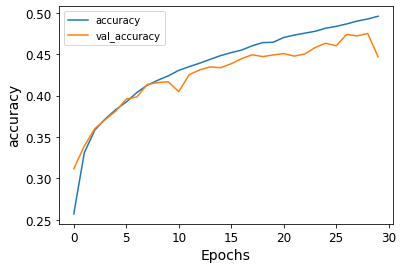

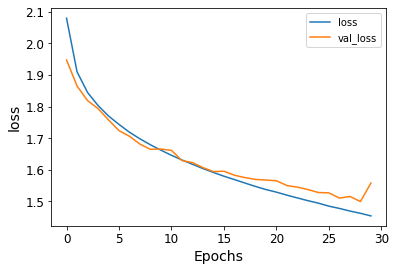

In [ ]:
# 성능 확인 그래프
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

은닉층 300-100-10 과 은닉층 400-150-10을 비교해봤을 때, 전자의 모델의 성능이 더 우수

### try3 - 은닉층 300-100-10 + LeakyRelu

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "Mlp_leaky_relu"
log_dir = "logs/seung_board/"
current_log_dir = log_dir + conf_name

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_mlp_leaky_relu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(300, kernel_initializer="he_normal"),  # he초기화 방식 사용
    keras.layers.LeakyReLU(),                                 # 활성화 함수: leakrelu() 
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model_mlp_leaky_relu.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trai

In [ ]:
with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_mlp_leaky_relu.h5", monitor='val_loss', mode='min', save_best_only=True)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_mlp_leaky_relu.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])
  history = model_mlp_leaky_relu.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 32)

Epoch 1/30
1407/1407 [==============================] - 5s 3ms/step - loss: 2.0632 - accuracy: 0.2565 - val_loss: 1.9346 - val_accuracy: 0.3106
Epoch 2/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9005 - accuracy: 0.3325 - val_loss: 1.8713 - val_accuracy: 0.3310
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8434 - accuracy: 0.3556 - val_loss: 1.8263 - val_accuracy: 0.3490
Epoch 4/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8084 - accuracy: 0.3668 - val_loss: 1.8056 - val_accuracy: 0.3584
Epoch 5/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7806 - accuracy: 0.3799 - val_loss: 1.7723 - val_accuracy: 0.3716
Epoch 6/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7585 - accuracy: 0.3879 - val_loss: 1.7425 - val_accuracy: 0.3828
Epoch 7/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7374 - accuracy: 0.3973 - val_loss: 1.7277 - val_accuracy:

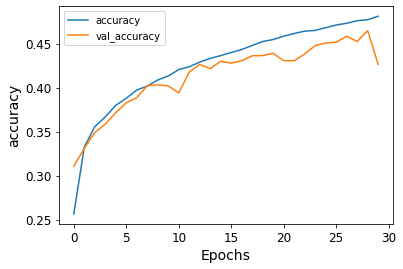

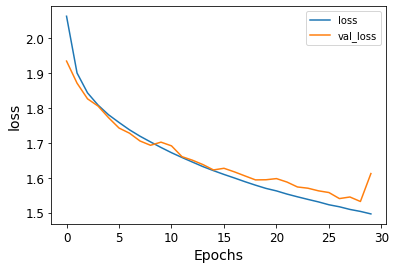

In [ ]:
# 성능 확인 그래프
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### try4 - 은닉층 300-100-10 + 배치정규화(BatchNormalization)

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "Mlp_batchnormal"
log_dir = "logs/seung_board/"
current_log_dir = log_dir + conf_name

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_mlp_batchnormal = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model_mlp_batchnormal.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 batch_normalization (BatchN  (None, 3072)             12288     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

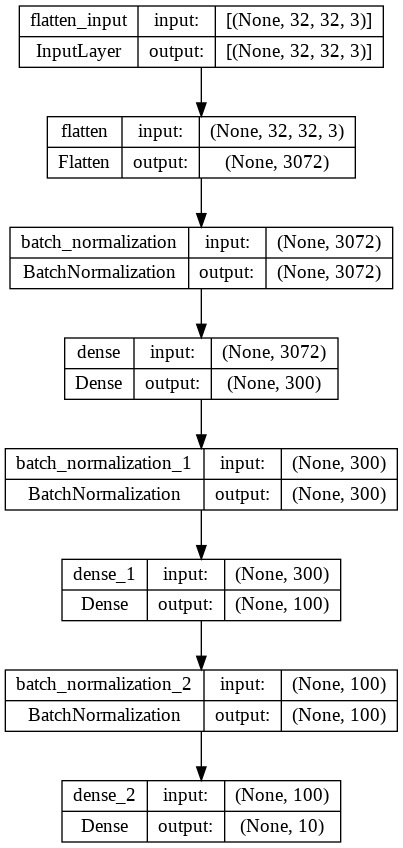

In [ ]:
keras.utils.plot_model(model_mlp_batchnormal,show_shapes = True)

In [ ]:
with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_mlp_batchnormal.h5", monitor='val_loss', mode='min', save_best_only=True)  # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_mlp_batchnormal.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])
  history = model_mlp_batchnormal.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 32)

Epoch 1/30
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0227 - accuracy: 0.3009 - val_loss: 1.7666 - val_accuracy: 0.3794
Epoch 2/30
1407/1407 [==============================] - 6s 5ms/step - loss: 1.7416 - accuracy: 0.3849 - val_loss: 1.6642 - val_accuracy: 0.4212
Epoch 3/30
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6568 - accuracy: 0.4180 - val_loss: 1.6119 - val_accuracy: 0.4382
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5958 - accuracy: 0.4375 - val_loss: 1.5734 - val_accuracy: 0.4540
Epoch 5/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5498 - accuracy: 0.4526 - val_loss: 1.5447 - val_accuracy: 0.4646
Epoch 6/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5093 - accuracy: 0.4698 - val_loss: 1.5227 - val_accuracy: 0.4742
Epoch 7/30
1407/1407 [==============================] - 6s 5ms/step - loss: 1.4769 - accuracy: 0.4803 - val_loss: 1.5096 - val_accuracy

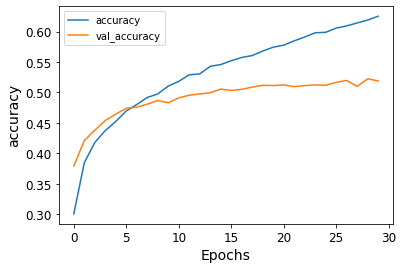

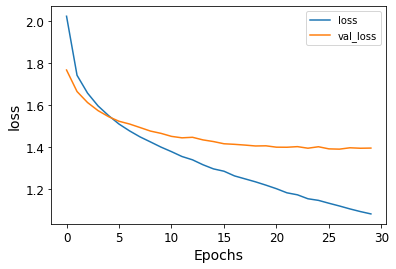

In [ ]:
# 성능 확인 그래프
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### try5 - 은닉층 300-100-10 + Drop out

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "Mlp_drop_out"
log_dir = "logs/seung_board/"
current_log_dir = log_dir + conf_name

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_mlp_drop_out = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

model_mlp_drop_out.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trai

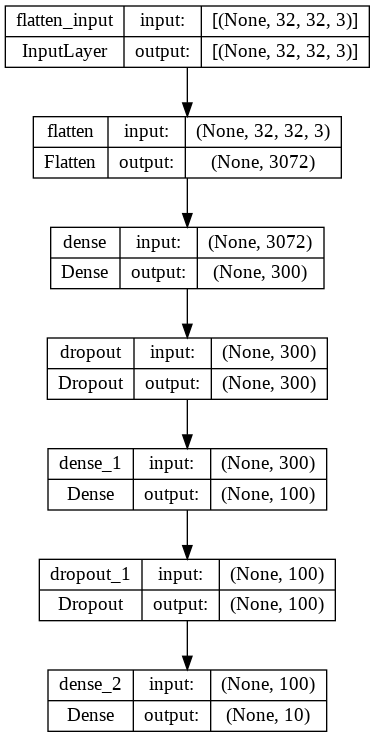

In [ ]:
keras.utils.plot_model(model_mlp_drop_out,show_shapes = True)

In [ ]:
with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_mlp_drop_out.h5", monitor='val_loss', mode='min', save_best_only=True)  # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_mlp_drop_out.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])
  history = model_mlp_drop_out.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 32)

Epoch 1/30
1407/1407 [==============================] - 5s 4ms/step - loss: 2.1821 - accuracy: 0.1894 - val_loss: 2.0241 - val_accuracy: 0.2792
Epoch 2/30
1407/1407 [==============================] - 5s 3ms/step - loss: 2.0340 - accuracy: 0.2576 - val_loss: 1.9305 - val_accuracy: 0.3186
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9695 - accuracy: 0.2897 - val_loss: 1.8797 - val_accuracy: 0.3488
Epoch 4/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9278 - accuracy: 0.3070 - val_loss: 1.8474 - val_accuracy: 0.3542
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8932 - accuracy: 0.3248 - val_loss: 1.8089 - val_accuracy: 0.3628
Epoch 6/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8674 - accuracy: 0.3350 - val_loss: 1.7883 - val_accuracy: 0.3824
Epoch 7/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8464 - accuracy: 0.3431 - val_loss: 1.7679 - val_accuracy:

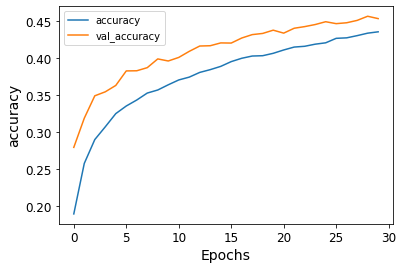

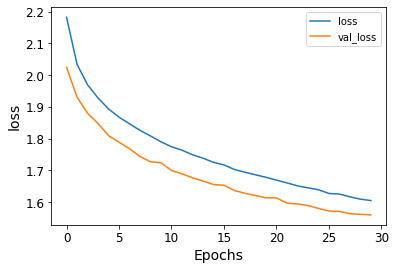

In [ ]:
# 성능 확인 그래프
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### 중간점검
* Try1 ~ Try5까지 실행한 결과, batch normalization(try4)일 때가 좋음   
* Try1가 Try4에 이어 두번째로 성능이 좋게 나왔지만, 학습 성능과 검증 성능이 차이가 많이 나와 과대적합이 되었다는 것을 확인한 후, Try1에 대하여 Dropout을 적용하였지만(try5) 오히려 성능이 더 낮게 나옴     
* 성능이 제일 잘 나온 배치정규화 모델(try4) 역시 과대적합이 된 것으로 보여, dropout을 적용한다.(try6) 

### try6 - 은닉층 300-100-10 + 배치정규화 + Drop out

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "Mlp_batchnormal_Dropout"
log_dir = "logs/seung_board/"
current_log_dir = log_dir + conf_name

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_mlp_batchnormal_Dropout = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),    # 초기값 설정
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,activation = 'relu'),  # 첫번쨰 은닉층: dense(퍼셉트론) 300개, 활성화 함수는 relu
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100,activation = 'relu'),  # 두번쨰 은닉층: dense(퍼셉트론) 100개, 활성화 함수는 relu
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation = 'softmax') # 출력층: dense(퍼셉트론) 10개, 활성화 함수는 softmax 
])

with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_mlp_batchnormal_Dropout.h5", monitor='val_loss', mode='min', save_best_only=True)  # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_mlp_batchnormal_Dropout.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])
  history = model_mlp_batchnormal_Dropout.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 32)

Epoch 1/30
1407/1407 [==============================] - 7s 5ms/step - loss: 2.2455 - accuracy: 0.2606 - val_loss: 1.7727 - val_accuracy: 0.3802
Epoch 2/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.9440 - accuracy: 0.3330 - val_loss: 1.6727 - val_accuracy: 0.4126
Epoch 3/30
1407/1407 [==============================] - 6s 5ms/step - loss: 1.8521 - accuracy: 0.3550 - val_loss: 1.6164 - val_accuracy: 0.4338
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7864 - accuracy: 0.3752 - val_loss: 1.5837 - val_accuracy: 0.4504
Epoch 5/30
1407/1407 [==============================] - 6s 5ms/step - loss: 1.7365 - accuracy: 0.3888 - val_loss: 1.5552 - val_accuracy: 0.4638
Epoch 6/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6996 - accuracy: 0.4035 - val_loss: 1.5300 - val_accuracy: 0.4690
Epoch 7/30
1407/1407 [==============================] - 8s 5ms/step - loss: 1.6687 - accuracy: 0.4114 - val_loss: 1.5125 - val_accuracy:

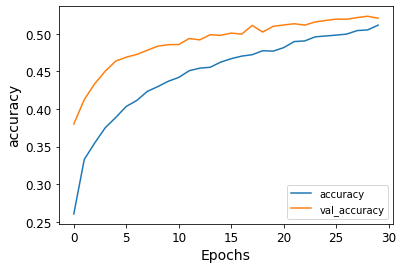

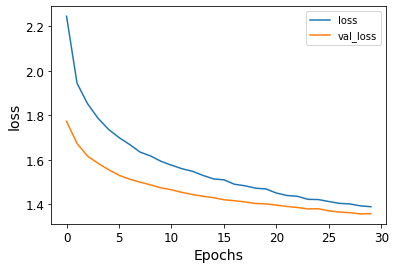

In [ ]:
# 성능 확인 그래프
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

훈련 데이터로 학습한 결과는 정확도와 손실 면에서 모두 배치정규화한 모델이 앞섰지만,  
valid 데이터로 검증한 결과는 정확도와 손실 면에서 배치정규화한 모델과 배치정규화+Dropout 적용한 모델 모두 서로 크게 다르지 않았다.(미세한 차이로 try6의 손실이 더 적음)    
→ dropout 적용으로 과대적합이 해소되었고(학습성능과 valid성능의 차이가 적어짐), valid성능이 비슷하게 나왔으므로, try6모델로 선정해도 나쁘지 않음

In [ ]:
model_mlp_batchnormal.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4034 - accuracy: 0.5125


[1.4034385681152344, 0.512499988079071]

In [ ]:
model_mlp_batchnormal_Dropout.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3552 - accuracy: 0.5172


[1.3552236557006836, 0.5171999931335449]

test 데이터로 확인할 결과, accuracy와 loss 모두 배치정규화+Dropout 적용 모델이 앞섰다.

## MLP 최종 결론

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

* 은닉층: 300→100→10 > 450→150→10  
* 배치정규화 + Dropout 적용한 모델의 성능이 우수 (Test 데이터 기준)
* 하지만 가장 성능이 우수한 모델의 정확도가 약 0.52로, 좋은 성능이라고 할 수는 없다

In [ ]:
# 모델 저장
from google.colab import files
files.download('model_mlp_batchnormal_Dropout.h5')  # from colab to browser download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 모델 훈련 (CNN - keras)

In [ ]:
from tensorflow.keras.layers import (Conv2D,Flatten,Dense,MaxPooling2D,Activation,Dropout,
                                     Input,GlobalAveragePooling2D, BatchNormalization)
from tensorflow.keras.optimizers import Adam

(CNN 코드 참고) https://blog.naver.com/PostView.naver?blogId=beyondlegend&logNo=222345469147&parentCategoryNo=&categoryNo=93&viewDate=&isShowPopularPosts=false&from=postView

### 단순 CNN1 - input층을 제로 패딩으로 훈련(padding = 'same')  
filter 128 layer을 하나 추가했을 때와 두개 추가했을 때의 성능을 비교해보고자하였다.

**#1 filter = 32 → 32 → 64 →64 → 128 → 128 → 256 → Flatten**

In [ ]:
# 텐서보드 구동을 위한 log 지정
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "CNN1_1"
log_dir = "logs/seung_board/"
current_log_dir = log_dir + conf_name

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# 1 filter = 32 → 32 → 64 →64 → 128 → 128 → 256 → Flatten

model_cnn = Sequential()
model_cnn.add(Conv2D(32,(7,7), strides = 1, activation = 'relu', padding = 'same', input_shape = (32,32,3)))  # filters = 32, kernel_size = 7, input_shape: 데이터가 32X32컬러 이므로 (32,32,3)
model_cnn.add(Conv2D(32,(3,3), strides = 1, activation = 'relu', padding = 'same'))
model_cnn.add(MaxPooling2D(pool_size = 2))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))       # filters = 64, kernel_size = 3
model_cnn.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model_cnn.add(MaxPooling2D(pool_size = 2))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model_cnn.add(MaxPooling2D(pool_size = 2))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model_cnn.add(MaxPooling2D(pool_size = 2))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model_cnn.add(MaxPooling2D(pool_size = 2))
model_cnn.add(Dropout(0.2))

model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation = 'relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(10, activation = 'softmax'))

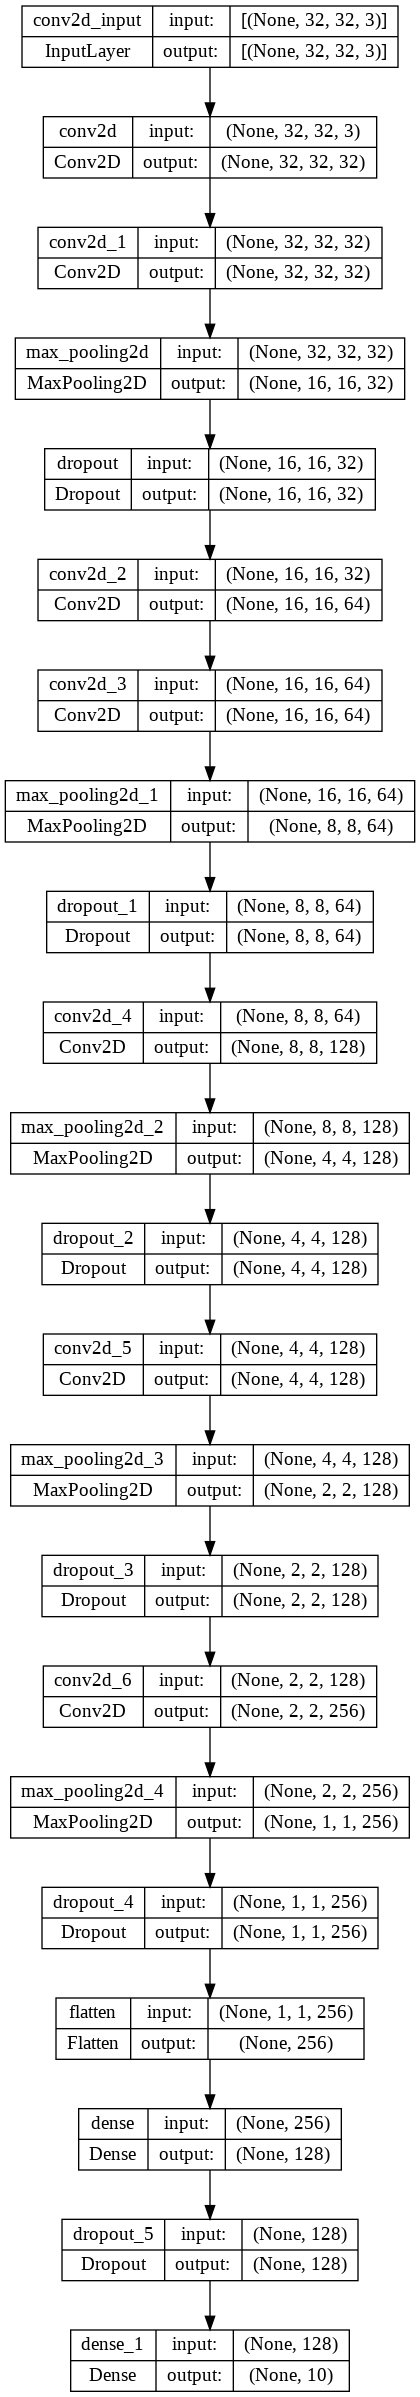

In [ ]:
keras.utils.plot_model(model_cnn,show_shapes = True)

In [ ]:
with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=15, monitor='val_loss', mode='min', restore_best_weights=True)    # val_loss 기준으로, 최소값보다 높은 값이 15번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model_cnn.h5", monitor='val_loss', mode='min', save_best_only=True)     # val_loss가 최솟값인 모델을 저장
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)    # 텐서보드 구동
  model_cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
  history = model_cnn.fit(X_train, y_train, epochs = 100, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 128)


Epoch 1/100
352/352 [==============================] - 13s 17ms/step - loss: 1.8864 - accuracy: 0.2787 - val_loss: 1.5434 - val_accuracy: 0.4250
Epoch 2/100
352/352 [==============================] - 5s 15ms/step - loss: 1.5054 - accuracy: 0.4421 - val_loss: 1.3563 - val_accuracy: 0.5026
Epoch 3/100
352/352 [==============================] - 5s 15ms/step - loss: 1.3113 - accuracy: 0.5240 - val_loss: 1.1614 - val_accuracy: 0.5838
Epoch 4/100
352/352 [==============================] - 5s 14ms/step - loss: 1.1844 - accuracy: 0.5780 - val_loss: 1.0763 - val_accuracy: 0.6222
Epoch 5/100
352/352 [==============================] - 5s 15ms/step - loss: 1.0819 - accuracy: 0.6187 - val_loss: 0.9857 - val_accuracy: 0.6566
Epoch 6/100
352/352 [==============================] - 5s 15ms/step - loss: 0.9957 - accuracy: 0.6501 - val_loss: 0.9051 - val_accuracy: 0.6836
Epoch 7/100
352/352 [==============================] - 6s 17ms/step - loss: 0.9325 - accuracy: 0.6738 - val_loss: 0.8338 - val_accuracy

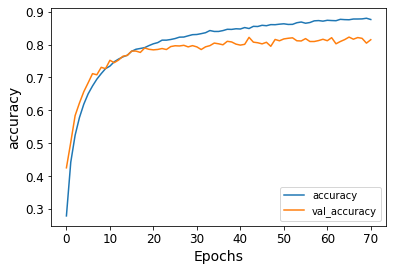

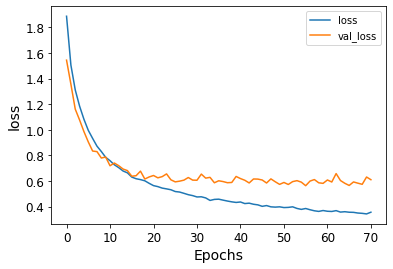

In [ ]:
# 성능 확인 그래프
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

**#2 filter = 32 → 32 → 64 →64 → 128 → 256 → Flatten**

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "CNN1_2"
log_dir = "logs/seung_board/"
current_log_dir = log_dir + conf_name

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# 2 filter = 32 → 32 → 64 →64 → 128 → 256 → Flatten

model_cnn_2 = Sequential()
model_cnn_2.add(Conv2D(32,(7,7), strides = 1, activation = 'relu', padding = 'same', input_shape = (32,32,3)))    # filters = 32, kernel_size = 7
model_cnn_2.add(Conv2D(32,(3,3), strides = 1, activation = 'relu', padding = 'same'))
model_cnn_2.add(MaxPooling2D(pool_size = 2))
model_cnn_2.add(Dropout(0.2))

model_cnn_2.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))           # filters = 64, kernel_size = 3
model_cnn_2.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model_cnn_2.add(MaxPooling2D(pool_size = 2))
model_cnn_2.add(Dropout(0.2))

model_cnn_2.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model_cnn_2.add(MaxPooling2D(pool_size = 2))
model_cnn_2.add(Dropout(0.2))

model_cnn_2.add(Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model_cnn_2.add(MaxPooling2D(pool_size = 2))
model_cnn_2.add(Dropout(0.2))

model_cnn_2.add(Flatten())
model_cnn_2.add(Dense(128, activation = 'relu'))
model_cnn_2.add(Dropout(0.2))
model_cnn_2.add(Dense(10, activation = 'softmax'))

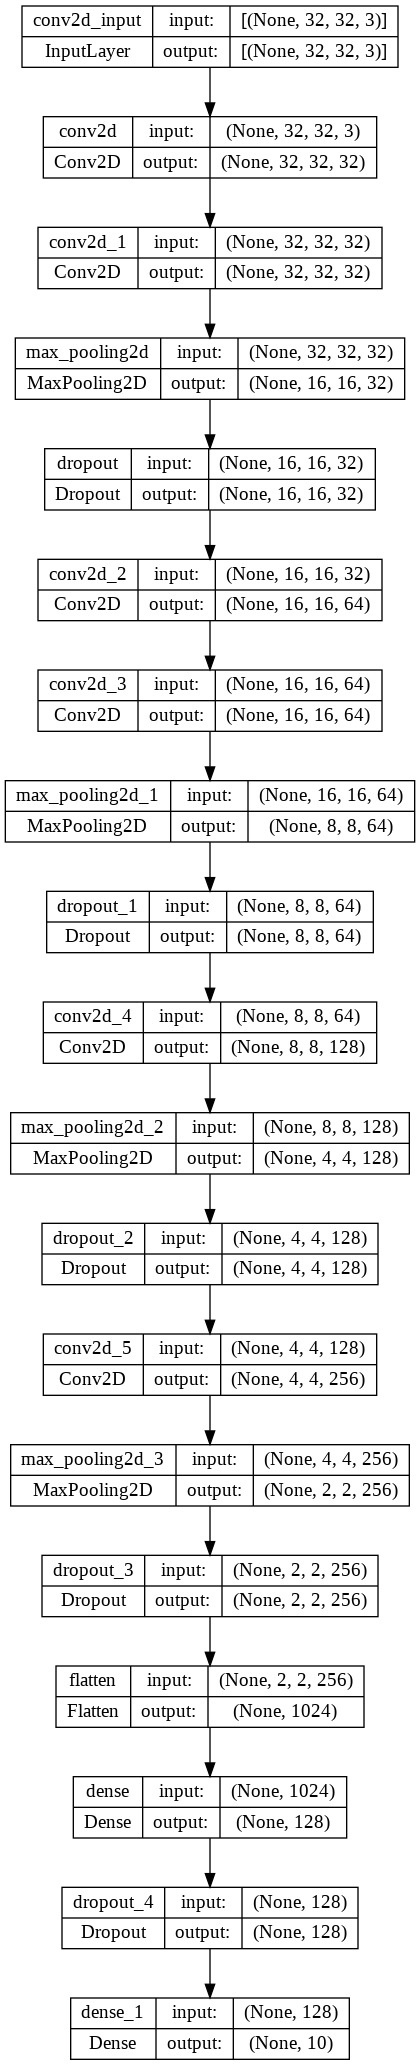

In [ ]:
keras.utils.plot_model(model_cnn_2,show_shapes = True)

In [ ]:
with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=15, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_cnn_2.h5", monitor='val_loss', mode='min', save_best_only=True)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_cnn_2.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
  history = model_cnn_2.fit(X_train, y_train, epochs = 100, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 128)

Epoch 1/100
352/352 [==============================] - 6s 16ms/step - loss: 1.8557 - accuracy: 0.3033 - val_loss: 1.5422 - val_accuracy: 0.4312
Epoch 2/100
352/352 [==============================] - 5s 15ms/step - loss: 1.4728 - accuracy: 0.4583 - val_loss: 1.2990 - val_accuracy: 0.5330
Epoch 3/100
352/352 [==============================] - 5s 15ms/step - loss: 1.2723 - accuracy: 0.5384 - val_loss: 1.1058 - val_accuracy: 0.6010
Epoch 4/100
352/352 [==============================] - 5s 15ms/step - loss: 1.1438 - accuracy: 0.5926 - val_loss: 0.9911 - val_accuracy: 0.6464
Epoch 5/100
352/352 [==============================] - 5s 15ms/step - loss: 1.0261 - accuracy: 0.6365 - val_loss: 0.8907 - val_accuracy: 0.6852
Epoch 6/100
352/352 [==============================] - 5s 15ms/step - loss: 0.9431 - accuracy: 0.6678 - val_loss: 0.8773 - val_accuracy: 0.6972
Epoch 7/100
352/352 [==============================] - 5s 15ms/step - loss: 0.8669 - accuracy: 0.6923 - val_loss: 0.8243 - val_accuracy:

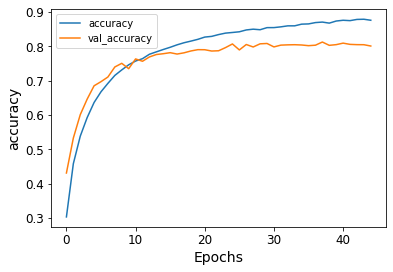

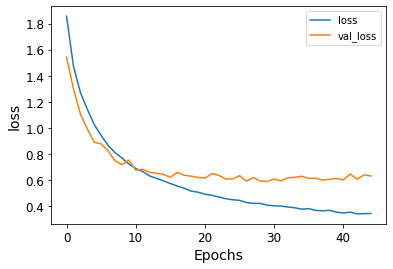

In [ ]:
# 성능 확인 그래프
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

Valid 셋으로 학습 및 검증 비교한 결과, valid 셋으로 검증했을 때의 성능은 둘 다 비슷  
Train 셋으로 학습한 결과, filter을 128개인 층을 하나 더 추가한 모델(model_cnn)의 성능이 좋게 나왔지만, 이는 층을 하나 더 추가해서 더 좋게 나온 것 같음  
→ Test셋으로 성능 확인해보자   


In [ ]:
model_cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.6139 - accuracy: 0.8094


[0.6138784885406494, 0.8094000220298767]

In [ ]:
model_cnn_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6478 - accuracy: 0.7891


[0.64781653881073, 0.7890999913215637]

**filter 32 → 32 → 64 →64 → 128 → 128 → 256 → Flatten으로 훈련한 모델(model_cnn)의 성능이 더 우수  (Test 데이터 기준)**   
따라서 이후 모델은 128이 두개인 층으로 계속 개발할 것이다

### 단순 CNN2 - input층을 패딩없이 훈련 (padding = 'valid')

(코드 참고) https://velog.io/@ym980118/%EB%94%A5%EB%9F%AC%EB%8B%9D-CIFAR10-%EC%9C%BC%EB%A1%9C-CNN-%EC%8B%A4%EC%8A%B5%ED%95%98%EA%B8%B0      

filter: 32 → 32 → 64 →64 → 128 → 128 → 256 → Flatten 순

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "CNN2"
log_dir = "logs/seung_board/"
current_log_dir = log_dir + conf_name

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_cnn2 = Sequential()
model_cnn2.add(Conv2D(32,(7,7), strides = 1, activation = 'relu', padding = 'valid', input_shape = (32,32,3)))  
model_cnn2.add(Conv2D(32,(3,3), strides = 1, activation = 'relu', padding = 'valid'))
model_cnn2.add(Conv2D(32,(3,3), strides = 1, activation = 'relu', padding = 'same'))
model_cnn2.add(MaxPooling2D(pool_size = 2))
model_cnn2.add(Dropout(0.2))

model_cnn2.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model_cnn2.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model_cnn2.add(MaxPooling2D(pool_size = 2))
model_cnn2.add(Dropout(0.2))

model_cnn2.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
# model_cnn2.add(MaxPooling2D(pool_size = 2))
# model_cnn2.add(Dropout(0.2))
model_cnn2.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model_cnn2.add(MaxPooling2D(pool_size = 2))
model_cnn2.add(Dropout(0.2))

model_cnn2.add(Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model_cnn2.add(MaxPooling2D(pool_size = 2))
model_cnn2.add(Dropout(0.2))

model_cnn2.add(Flatten())
model_cnn2.add(Dense(128, activation = 'relu'))
model_cnn2.add(Dropout(0.2))
model_cnn2.add(Dense(10, activation = 'softmax'))

가운데 주석처리 부분,  
```
ValueError: Exception encountered when calling layer "max_pooling2d_4" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_4/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,256].

Call arguments received by layer "max_pooling2d_4" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 256), dtype=float32)
```
다음과 같은 에러로, 주석처리


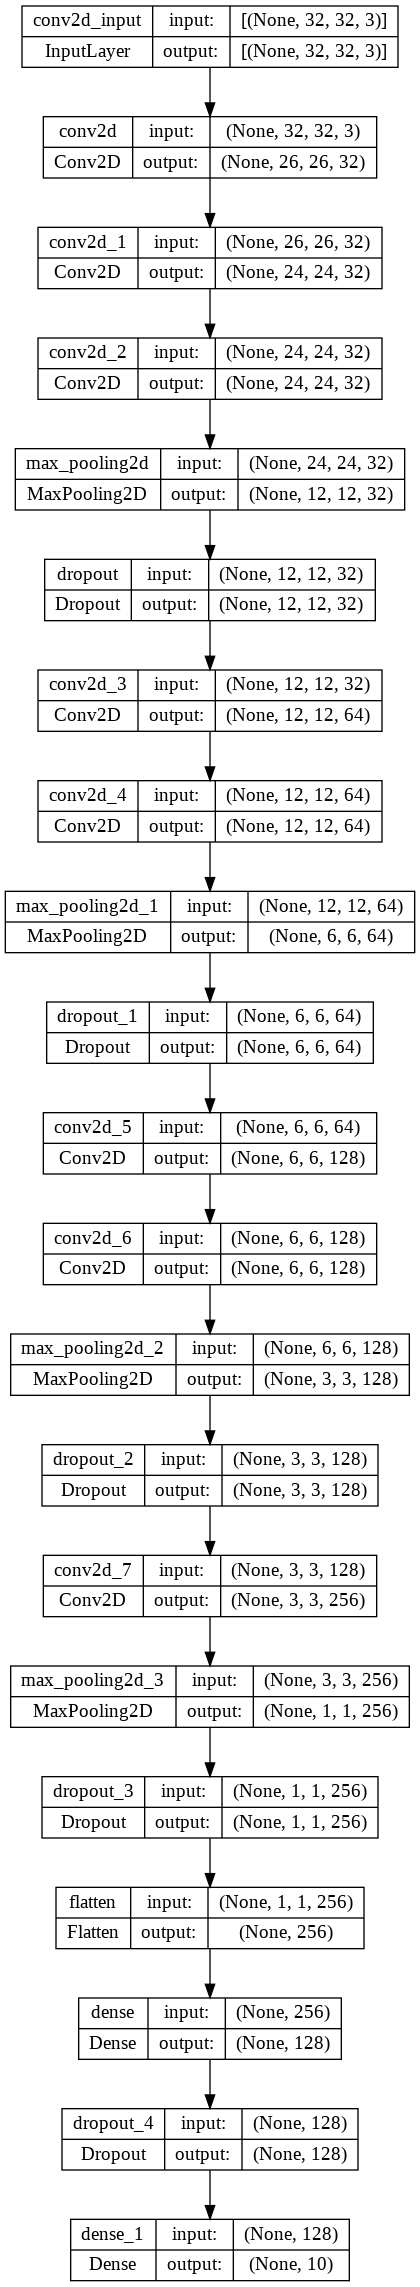

In [ ]:
keras.utils.plot_model(model_cnn2,show_shapes = True)

In [ ]:
with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=15, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_cnn2.h5", monitor='val_loss', mode='min', save_best_only=True)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_cnn2.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
  history = model_cnn2.fit(X_train, y_train, epochs = 100, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 128)

Epoch 1/100
352/352 [==============================] - 7s 17ms/step - loss: 1.9162 - accuracy: 0.2518 - val_loss: 1.6553 - val_accuracy: 0.3702
Epoch 2/100
352/352 [==============================] - 5s 14ms/step - loss: 1.5823 - accuracy: 0.4031 - val_loss: 1.4328 - val_accuracy: 0.4810
Epoch 3/100
352/352 [==============================] - 5s 14ms/step - loss: 1.4078 - accuracy: 0.4873 - val_loss: 1.2966 - val_accuracy: 0.5432
Epoch 4/100
352/352 [==============================] - 5s 14ms/step - loss: 1.2692 - accuracy: 0.5460 - val_loss: 1.1817 - val_accuracy: 0.5780
Epoch 5/100
352/352 [==============================] - 5s 14ms/step - loss: 1.1492 - accuracy: 0.5923 - val_loss: 1.0272 - val_accuracy: 0.6306
Epoch 6/100
352/352 [==============================] - 5s 14ms/step - loss: 1.0578 - accuracy: 0.6247 - val_loss: 0.9757 - val_accuracy: 0.6602
Epoch 7/100
352/352 [==============================] - 5s 15ms/step - loss: 0.9897 - accuracy: 0.6520 - val_loss: 0.9549 - val_accuracy:

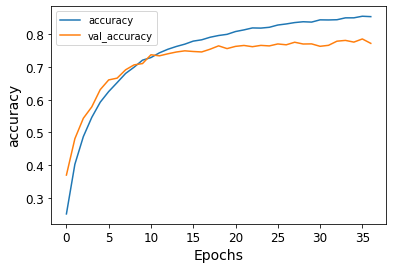

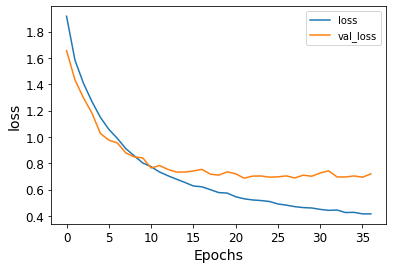

In [ ]:
# 성능 확인 그래프
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [ ]:
model_cnn2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7020 - accuracy: 0.7696


[0.7019793391227722, 0.769599974155426]

Train, Valid set으로는 padding='same' 적용 모델과 padding=  'valid' 적용 모델의 성능을 비교할 수 없어, Test set으로 성능 검증  
→ input층을 padding = 'same'으로 적용한 모델의 성능이 더 우수 (0.8094 > 0.0796)

### 단순 CNN3 (CNN1, CNN2 중 성능 좋은 모델 + batchnormalization 추가)   
CNN1, CNN2 중 CNN1의 성능이 더 우수했으므로, CNN1_1모델에 배치정규화(batchnormalization) 추가

※ CNN 네트워크 구성 순서를 Convolution - Batch Normalization - Activation - Dropout - Pooling으로 적용 시, 성능이 더 우수하게 나온다는 글을 접함.   
https://gaussian37.github.io/dl-concept-order_of_regularization_term/      

필자는 먼저 기존해 해왔던 Pooling→Dropout (#1)을 적용해보고, Dropout→Pooling순(#2)으로도 추가 적용해본 후 두 모델의 성능을 비교하고자함

**#1 순서 Convolution - Batch Normalization - Activation - Pooling - Dropout**

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "CNN3"
log_dir = "logs/seung_board/"
current_log_dir = log_dir + conf_name

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_cnn3_1 = Sequential()
model_cnn3_1.add(Conv2D(32,(7,7), strides = 1, activation = None, padding = 'same', input_shape = (32,32,3)))  # filters = 32, kernel_size = 3
model_cnn3_1.add(Conv2D(32,(3,3), strides = 1, activation = None, padding = 'same'))
model_cnn3_1.add(BatchNormalization())
model_cnn3_1.add(Activation('relu'))
model_cnn3_1.add(MaxPooling2D(pool_size = 2))
model_cnn3_1.add(Dropout(0.2))

model_cnn3_1.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_cnn3_1.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_cnn3_1.add(BatchNormalization())
model_cnn3_1.add(Activation('relu'))
model_cnn3_1.add(MaxPooling2D(pool_size = 2))
model_cnn3_1.add(Dropout(0.2))

model_cnn3_1.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_cnn3_1.add(BatchNormalization())
model_cnn3_1.add(Activation('relu'))
model_cnn3_1.add(MaxPooling2D(pool_size = 2))
model_cnn3_1.add(Dropout(0.2))

model_cnn3_1.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_cnn3_1.add(BatchNormalization())
model_cnn3_1.add(Activation('relu'))
model_cnn3_1.add(MaxPooling2D(pool_size = 2))
model_cnn3_1.add(Dropout(0.2))

model_cnn3_1.add(Conv2D(256,(3,3), activation = None, padding = 'same'))
model_cnn3_1.add(BatchNormalization())
model_cnn3_1.add(Activation('relu'))
model_cnn3_1.add(MaxPooling2D(pool_size = 2))
model_cnn3_1.add(Dropout(0.2))

model_cnn3_1.add(Flatten())
model_cnn3_1.add(Dense(128, activation = 'relu'))
model_cnn3_1.add(Dropout(0.2))
model_cnn3_1.add(Dense(10, activation = 'softmax'))

In [ ]:
with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=25, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_cnn3_1.h5", monitor='val_loss', mode='min', save_best_only=True)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_cnn3_1.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
  history = model_cnn3_1.fit(X_train, y_train, epochs = 100, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 128)

Epoch 1/100
352/352 [==============================] - 8s 19ms/step - loss: 1.6826 - accuracy: 0.3797 - val_loss: 1.4843 - val_accuracy: 0.4740
Epoch 2/100
352/352 [==============================] - 6s 17ms/step - loss: 1.2633 - accuracy: 0.5434 - val_loss: 1.1087 - val_accuracy: 0.6046
Epoch 3/100
352/352 [==============================] - 6s 17ms/step - loss: 1.0628 - accuracy: 0.6199 - val_loss: 1.1754 - val_accuracy: 0.6070
Epoch 4/100
352/352 [==============================] - 6s 17ms/step - loss: 0.9516 - accuracy: 0.6656 - val_loss: 1.1022 - val_accuracy: 0.6134
Epoch 5/100
352/352 [==============================] - 6s 17ms/step - loss: 0.8675 - accuracy: 0.6975 - val_loss: 1.0027 - val_accuracy: 0.6612
Epoch 6/100
352/352 [==============================] - 6s 16ms/step - loss: 0.8065 - accuracy: 0.7198 - val_loss: 0.8524 - val_accuracy: 0.7018
Epoch 7/100
352/352 [==============================] - 6s 17ms/step - loss: 0.7580 - accuracy: 0.7376 - val_loss: 0.7135 - val_accuracy:

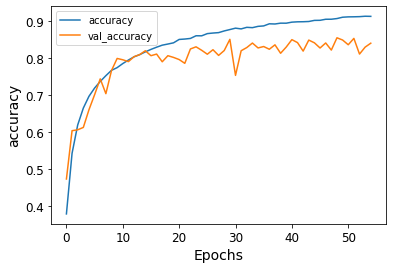

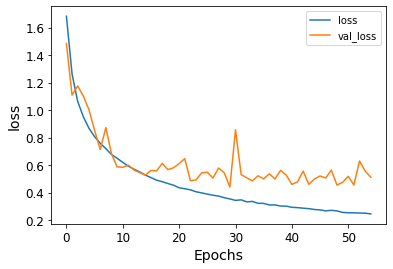

In [ ]:
# 성능 확인 그래프
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

**#2 순서 Convolution - Batch Normalization - Activation - Dropout - Pooling**

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "CNN3_2"
log_dir = "logs/seung_board/"
current_log_dir = log_dir + conf_name

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_cnn3_2 = Sequential()
model_cnn3_2.add(Conv2D(32,(7,7), strides = 1, activation = None, padding = 'same', input_shape = (32,32,3)))  # filters = 32, kernel_size = 3
model_cnn3_2.add(Conv2D(32,(3,3), strides = 1, activation = None, padding = 'same'))
model_cnn3_2.add(BatchNormalization())
model_cnn3_2.add(Activation('relu'))
model_cnn3_2.add(Dropout(0.2))
model_cnn3_2.add(MaxPooling2D(pool_size = 2))

model_cnn3_2.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_cnn3_2.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_cnn3_2.add(BatchNormalization())
model_cnn3_2.add(Activation('relu'))
model_cnn3_2.add(Dropout(0.2))
model_cnn3_2.add(MaxPooling2D(pool_size = 2))

model_cnn3_2.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_cnn3_2.add(BatchNormalization())
model_cnn3_2.add(Activation('relu'))
model_cnn3_2.add(Dropout(0.2))
model_cnn3_2.add(MaxPooling2D(pool_size = 2))

model_cnn3_2.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_cnn3_2.add(BatchNormalization())
model_cnn3_2.add(Activation('relu'))
model_cnn3_2.add(Dropout(0.2))
model_cnn3_2.add(MaxPooling2D(pool_size = 2))

model_cnn3_2.add(Conv2D(256,(3,3), activation = None, padding = 'same'))
model_cnn3_2.add(BatchNormalization())
model_cnn3_2.add(Activation('relu'))
model_cnn3_2.add(Dropout(0.2))
model_cnn3_2.add(MaxPooling2D(pool_size = 2))

model_cnn3_2.add(Flatten())
model_cnn3_2.add(Dense(128, activation = 'relu'))
model_cnn3_2.add(Dropout(0.2))
model_cnn3_2.add(Dense(10, activation = 'softmax'))

In [ ]:
with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=40, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_cnn3_2.h5", monitor='val_loss', mode='min', save_best_only=True)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_cnn3_2.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
  history = model_cnn3_2.fit(X_train, y_train, epochs = 100, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 128)

Epoch 1/100
352/352 [==============================] - 8s 21ms/step - loss: 1.5313 - accuracy: 0.4400 - val_loss: 1.9148 - val_accuracy: 0.3092
Epoch 2/100
352/352 [==============================] - 7s 20ms/step - loss: 1.0978 - accuracy: 0.6088 - val_loss: 1.2583 - val_accuracy: 0.5342
Epoch 3/100
352/352 [==============================] - 7s 20ms/step - loss: 0.9025 - accuracy: 0.6841 - val_loss: 1.0976 - val_accuracy: 0.6028
Epoch 4/100
352/352 [==============================] - 7s 21ms/step - loss: 0.7927 - accuracy: 0.7245 - val_loss: 1.4301 - val_accuracy: 0.4956
Epoch 5/100
352/352 [==============================] - 7s 21ms/step - loss: 0.7097 - accuracy: 0.7562 - val_loss: 1.0888 - val_accuracy: 0.6362
Epoch 6/100
352/352 [==============================] - 9s 26ms/step - loss: 0.6476 - accuracy: 0.7748 - val_loss: 1.0821 - val_accuracy: 0.6188
Epoch 7/100
352/352 [==============================] - 8s 23ms/step - loss: 0.5976 - accuracy: 0.7937 - val_loss: 0.8319 - val_accuracy:

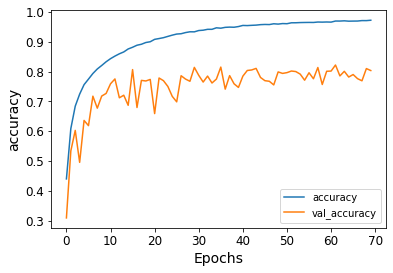

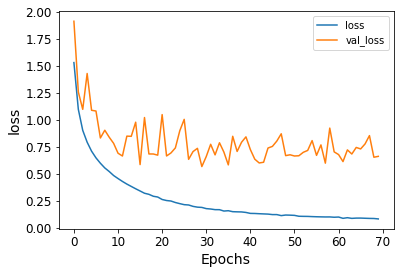

In [ ]:
# 성능 확인 그래프
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model_cnn3_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4887 - accuracy: 0.8376


[0.488706111907959, 0.8375999927520752]

In [ ]:
model_cnn3_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5871 - accuracy: 0.8055


[0.5871414542198181, 0.8054999709129333]

model_cnn3_1(Convolution - Batch Normalization - Activation - Pooling - Dropout순)모델의 성능이 Train, Valid, Test set 부문에서 모두 우수

### 단순 CNN(1,2,3) 최종 결론

**Convolution - Batch Normalization - Activation - Pooling - Dropout 순으로 진행한 CNN3_1 모델의 성능이 가장 우수 (Test set 정확도: 0.8376)**

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

**test 이미지로 직접 확인**

In [ ]:
X_new = X_test[:36]  # X_test 이미지 36장 가져오기

y_proba = model_cnn3_1.predict(X_new)  # X_test 36장 이미지에 대한 예측 및 확률 값 출력
y_proba.round(2)

2/2 [==============================] - 0s 143ms/step


array([[0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.94, 0.  ],
       [0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.96, 0.  ],
       [0.77, 0.  , 0.05, 0.  , 0.01, 0.  , 0.  , 0.  , 0.16, 0.01],
       [0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.96, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.91, 0.01, 0.07, 0.01, 0.01, 0.  , 0.  ],
       [0.  , 0.92, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08],
       [0.98, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.04, 0.16, 0.45, 0.28, 0.04, 0.02, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.

* 첫번째 이미지: 99% 확률로 3(Cat)
* 두번쨰 이미지: 94% 확률로 8(Ship)
* 세번째 이미지: 96% 확률로 8(Ship)
* 네번째 이미지: 77% 확률로 0(airplane)      

....    
....    
....

In [ ]:
# 예측 레이블 값 순서대로 출력

y_pred = np.argmax(model_cnn3_1.predict(X_new), axis = -1)   # 각 줄당 max값 출력
y_pred

2/2 [==============================] - 0s 8ms/step


array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 4, 7, 9, 8, 5, 7, 8, 6, 1, 2,
       4, 9, 4, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 8])

In [ ]:
# 실제 레이블 값 순서대로 출력

y_new = y_test[:36]
y_new.flatten()

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0,
       4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2], dtype=uint8)

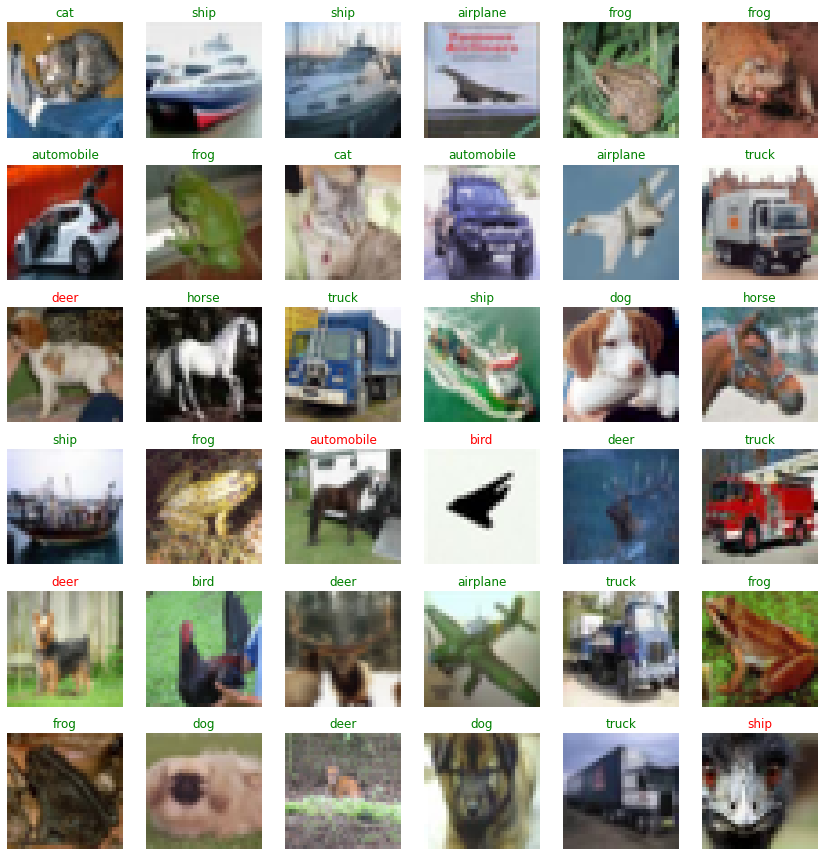

In [ ]:
# class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(12,12))
for index, image in enumerate(X_new):
    plt.subplot(6,6, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred.flatten()[index]], 
              color = 'green' if y_pred.flatten()[index] == y_new.flatten()[index] else 'red')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.tight_layout()
plt.show()

맞게 예측했으면 초록색, 틀리게 예측했으면 빨강색으로 제목(레이블) 표시     

( 그래프 출력 참고 ) https://jjeongil.tistory.com/953

In [ ]:
from google.colab import files

files.download('model_cnn3_1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### ResNet50

< Rest 모델 적용 동기 >  
"영상기반 콘크리트 균열 탐지 딥러닝 모델의 유형별 성능 비교"논문(https://koreascience.kr/article/JAKO201915555313341.pdf) 에 따르면,
CNN은 크게 물체 분류, 물체 탐지, 형태 세분화, 인스턴스 세분화로 나뉘며,   
물체 분류(Image Classification) 모델 종류에는 Resnet, VGG-16, AlesNet 등이 있다.     
이 모델들 중, ILSVRC 2015대회에서 우승한 Resnet모델을 사용하고자 한다.    

152개의 깊은 층으로 이루어진 Resnet모델로 우승했으므로, 34보다 더 깊은 층을 가진 Resnet-50모델을 사용

코드참고:     
https://keras.io/ko/applications/    
https://jjeongil.tistory.com/872


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
frozen = keras.applications.resnet50.ResNet50(weights="imagenet", input_shape = (32,32,3), 
                                                      include_top = False, classes = 10)

`include_top = True`이면 다음과 같은 에러 발생    
"ValueError: When setting `include_top=True` and loading `imagenet` weights, `input_shape` should be (224, 224, 3).  Received: input_shape=(32, 32, 3)"

In [ ]:
from keras.models import Sequential, Model

trainable = frozen.output
trainable = GlobalAveragePooling2D()(trainable)      # GlobarlAveragePooling2D(): Flatten()의 역할 (https://koreapy.tistory.com/916)
trainable = Dense(128, activation="relu")(trainable)
trainable = Dropout(0.2)(trainable)
trainable = Dense(32, activation="relu")(trainable)
trainable = Dropout(0.2)(trainable)
trainable = Dense(10, activation="softmax")(trainable)

model_resnet50 = Model(inputs=frozen.input, outputs=frozen.output)
model_resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=20, monitor='val_loss', mode='min')
  ch = keras.callbacks.ModelCheckpoint("model_resnet50.h5", monitor='val_loss', mode='min', save_best_only=True) 
  model_resnet50.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate=1e-3), metrics = ['accuracy'])
  history = model_resnet50.fit(X_train, y_train, epochs = 100, validation_data=(X_valid, y_valid), callbacks = [es,ch], batch_size = 128)

Epoch 1/100
352/352 [==============================] - 29s 68ms/step - loss: 8.3954 - accuracy: 0.0924 - val_loss: 7.6246 - val_accuracy: 0.1012
Epoch 2/100
352/352 [==============================] - 22s 63ms/step - loss: 7.8921 - accuracy: 0.0976 - val_loss: 7.9435 - val_accuracy: 0.0983
Epoch 3/100
352/352 [==============================] - 22s 62ms/step - loss: 7.8408 - accuracy: 0.0984 - val_loss: 7.6905 - val_accuracy: 0.1009
Epoch 4/100
352/352 [==============================] - 22s 62ms/step - loss: 7.7832 - accuracy: 0.0988 - val_loss: 7.6834 - val_accuracy: 0.1006
Epoch 5/100
352/352 [==============================] - 22s 63ms/step - loss: 7.7640 - accuracy: 0.0987 - val_loss: 7.6246 - val_accuracy: 0.1012
Epoch 6/100
352/352 [==============================] - 21s 61ms/step - loss: 7.7592 - accuracy: 0.0988 - val_loss: 7.6425 - val_accuracy: 0.1010
Epoch 7/100
352/352 [==============================] - 23s 64ms/step - loss: 7.7766 - accuracy: 0.0986 - val_loss: 7.7532 - val_ac

성능이 너무..처참하다   
(참고한 코드에서도 성능이 70%대로 나와, resnet은 적용하지 않기로 한다)

## 모델 최종 결론1 및 고도화

* MLP와 CNN의 종합적인 결과로 봤을 때, CNN3_1 모델(Convolution - Batch Normalization - Activation - Pooling - Dropout 순서)이 MLP_Batchnormal_Dropout보다 훨씬 우수한 성능을 가진 것으로 결론
* CNN3_1모델을 Origin으로 간주하고, origin모델을 고도화하여 성능을 더욱 높이는 작업 진행

### 1 - Origin

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "Origin"
log_dir = "logs/seung_board/advanced_model/"
current_log_dir = log_dir + conf_name

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model_origin = Sequential()
model_origin.add(Conv2D(32,(7,7), strides = 1, activation = None, padding = 'same', input_shape = (32,32,3)))  # filters = 32, kernel_size = 3
model_origin.add(Conv2D(32,(3,3), strides = 1, activation = None, padding = 'same'))
model_origin.add(BatchNormalization())
model_origin.add(Activation('relu'))
model_origin.add(MaxPooling2D(pool_size = 2))
model_origin.add(Dropout(0.2))

model_origin.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_origin.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_origin.add(BatchNormalization())
model_origin.add(Activation('relu'))
model_origin.add(MaxPooling2D(pool_size = 2))
model_origin.add(Dropout(0.2))

model_origin.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_origin.add(BatchNormalization())
model_origin.add(Activation('relu'))
model_origin.add(MaxPooling2D(pool_size = 2))
model_origin.add(Dropout(0.2))

model_origin.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_origin.add(BatchNormalization())
model_origin.add(Activation('relu'))
model_origin.add(MaxPooling2D(pool_size = 2))
model_origin.add(Dropout(0.2))

model_origin.add(Conv2D(256,(3,3), activation = None, padding = 'same'))
model_origin.add(BatchNormalization())
model_origin.add(Activation('relu'))
model_origin.add(MaxPooling2D(pool_size = 2))
model_origin.add(Dropout(0.2))

model_origin.add(Flatten())
model_origin.add(Dense(128, activation = 'relu'))
model_origin.add(Dropout(0.2))
model_origin.add(Dense(10, activation = 'softmax'))

with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=40, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_origin.h5", monitor='val_loss', mode='min', save_best_only=True)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_origin.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
  history = model_origin.fit(X_train, y_train, epochs = 100, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 128)

Epoch 1/100
352/352 [==============================] - 7s 17ms/step - loss: 1.6874 - accuracy: 0.3803 - val_loss: 1.4295 - val_accuracy: 0.4722
Epoch 2/100
352/352 [==============================] - 6s 16ms/step - loss: 1.2565 - accuracy: 0.5483 - val_loss: 1.1243 - val_accuracy: 0.5876
Epoch 3/100
352/352 [==============================] - 6s 17ms/step - loss: 1.0579 - accuracy: 0.6245 - val_loss: 1.0310 - val_accuracy: 0.6452
Epoch 4/100
352/352 [==============================] - 7s 19ms/step - loss: 0.9428 - accuracy: 0.6671 - val_loss: 0.8117 - val_accuracy: 0.7130
Epoch 5/100
352/352 [==============================] - 6s 17ms/step - loss: 0.8575 - accuracy: 0.7009 - val_loss: 0.8495 - val_accuracy: 0.7052
Epoch 6/100
352/352 [==============================] - 6s 16ms/step - loss: 0.7980 - accuracy: 0.7222 - val_loss: 0.8750 - val_accuracy: 0.7106
Epoch 7/100
352/352 [==============================] - 7s 19ms/step - loss: 0.7470 - accuracy: 0.7422 - val_loss: 0.9248 - val_accuracy:

### 2 - filter256 layer 하나 더 추가

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "add_256filter"
log_dir = "logs/seung_board/advanced_model/"
current_log_dir = log_dir + conf_name

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model_good1 = Sequential()
model_good1.add(Conv2D(32,(7,7), strides = 1, activation = None, padding = 'same', input_shape = (32,32,3)))  # filters = 32, kernel_size = 3
model_good1.add(Conv2D(32,(3,3), strides = 1, activation = None, padding = 'same'))
model_good1.add(BatchNormalization())
model_good1.add(Activation('relu'))
model_good1.add(MaxPooling2D(pool_size = 2))
model_good1.add(Dropout(0.2))

model_good1.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_good1.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_good1.add(BatchNormalization())
model_good1.add(Activation('relu'))
model_good1.add(MaxPooling2D(pool_size = 2))
model_good1.add(Dropout(0.2))

model_good1.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_good1.add(BatchNormalization())
model_good1.add(Activation('relu'))
model_good1.add(MaxPooling2D(pool_size = 2))
model_good1.add(Dropout(0.2))

model_good1.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_good1.add(BatchNormalization())
model_good1.add(Activation('relu'))
model_good1.add(MaxPooling2D(pool_size = 2))
model_good1.add(Dropout(0.2))

model_good1.add(Conv2D(256,(3,3), activation = None, padding = 'same'))
# padding = 'valid'에서 발생한 동일한 에러로 해당 부분은 주석처리
# model_good1.add(BatchNormalization())
# model_good1.add(Activation('relu'))
# model_good1.add(MaxPooling2D(pool_size = 2))
# model_good1.add(Dropout(0.2))

model_good1.add(Conv2D(256,(3,3), activation = None, padding = 'same'))
model_good1.add(BatchNormalization())
model_good1.add(Activation('relu'))
model_good1.add(MaxPooling2D(pool_size = 2))
model_good1.add(Dropout(0.2))

model_good1.add(Flatten())
model_good1.add(Dense(128, activation = 'relu'))
model_good1.add(Dropout(0.2))
model_good1.add(Dense(10, activation = 'softmax'))

with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=40, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_good1.h5", monitor='val_loss', mode='min', save_best_only=True)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_good1.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
  history = model_good1.fit(X_train, y_train, epochs = 100, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 128)

Epoch 1/100
352/352 [==============================] - 10s 19ms/step - loss: 1.6847 - accuracy: 0.3771 - val_loss: 1.3551 - val_accuracy: 0.5088
Epoch 2/100
352/352 [==============================] - 6s 17ms/step - loss: 1.2675 - accuracy: 0.5429 - val_loss: 1.3310 - val_accuracy: 0.5448
Epoch 3/100
352/352 [==============================] - 6s 17ms/step - loss: 1.0883 - accuracy: 0.6130 - val_loss: 1.2186 - val_accuracy: 0.5958
Epoch 4/100
352/352 [==============================] - 6s 17ms/step - loss: 0.9775 - accuracy: 0.6550 - val_loss: 0.8697 - val_accuracy: 0.6972
Epoch 5/100
352/352 [==============================] - 7s 19ms/step - loss: 0.8875 - accuracy: 0.6934 - val_loss: 1.0620 - val_accuracy: 0.6442
Epoch 6/100
352/352 [==============================] - 8s 23ms/step - loss: 0.8262 - accuracy: 0.7114 - val_loss: 0.8350 - val_accuracy: 0.7096
Epoch 7/100
352/352 [==============================] - 6s 18ms/step - loss: 0.7770 - accuracy: 0.7320 - val_loss: 0.7842 - val_accuracy

Origin모델과 비교했을 때, 위의 모델의 성능이 더 좋게 나왔으므로, 256filter 층을 하나 더 추가한 모델로 계속 고도화 작업 진행

### 3 - Dropout 0.3 

학습 accuracy와 valid accuracy의 차이가 크게 나온 것 같아 과대적합을 해소하기 위해 Dropout 값을 0.3으로 늘림

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "Dropout0.3"
log_dir = "logs/seung_board/advanced_model/"
current_log_dir = log_dir + conf_name

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model_good2 = Sequential()
model_good2.add(Conv2D(32,(7,7), strides = 1, activation = None, padding = 'same', input_shape = (32,32,3)))  # filters = 32, kernel_size = 3
model_good2.add(Conv2D(32,(3,3), strides = 1, activation = None, padding = 'same'))
model_good2.add(BatchNormalization())
model_good2.add(Activation('relu'))
model_good2.add(MaxPooling2D(pool_size = 2))
model_good2.add(Dropout(0.3))

model_good2.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_good2.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_good2.add(BatchNormalization())
model_good2.add(Activation('relu'))
model_good2.add(MaxPooling2D(pool_size = 2))
model_good2.add(Dropout(0.3))

model_good2.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_good2.add(BatchNormalization())
model_good2.add(Activation('relu'))
model_good2.add(MaxPooling2D(pool_size = 2))
model_good2.add(Dropout(0.3))

model_good2.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_good2.add(BatchNormalization())
model_good2.add(Activation('relu'))
model_good2.add(MaxPooling2D(pool_size = 2))
model_good2.add(Dropout(0.3))

model_good2.add(Conv2D(256,(3,3), activation = None, padding = 'same'))
model_good2.add(Conv2D(256,(3,3), activation = None, padding = 'same'))
model_good2.add(BatchNormalization())
model_good2.add(Activation('relu'))
model_good2.add(MaxPooling2D(pool_size = 2))
model_good2.add(Dropout(0.3))

model_good2.add(Flatten())
model_good2.add(Dense(128, activation = 'relu'))
model_good2.add(Dropout(0.2))
model_good2.add(Dense(10, activation = 'softmax'))

with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=40, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_good2.h5", monitor='val_loss', mode='min', save_best_only=True)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_good2.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
  history = model_good2.fit(X_train, y_train, epochs = 100, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 128)

Epoch 1/100
352/352 [==============================] - 7s 18ms/step - loss: 1.7905 - accuracy: 0.3280 - val_loss: 1.4796 - val_accuracy: 0.4564
Epoch 2/100
352/352 [==============================] - 6s 17ms/step - loss: 1.3890 - accuracy: 0.4907 - val_loss: 1.2001 - val_accuracy: 0.5602
Epoch 3/100
352/352 [==============================] - 6s 17ms/step - loss: 1.2226 - accuracy: 0.5583 - val_loss: 1.2142 - val_accuracy: 0.5788
Epoch 4/100
352/352 [==============================] - 6s 17ms/step - loss: 1.1085 - accuracy: 0.6023 - val_loss: 1.1725 - val_accuracy: 0.5858
Epoch 5/100
352/352 [==============================] - 6s 17ms/step - loss: 1.0237 - accuracy: 0.6371 - val_loss: 0.8528 - val_accuracy: 0.7036
Epoch 6/100
352/352 [==============================] - 6s 17ms/step - loss: 0.9498 - accuracy: 0.6664 - val_loss: 0.8065 - val_accuracy: 0.7198
Epoch 7/100
352/352 [==============================] - 6s 16ms/step - loss: 0.9012 - accuracy: 0.6854 - val_loss: 0.8134 - val_accuracy:

과대적합 해소됨

### 4 - fit batchsize 64

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "batch64"
log_dir = "logs/seung_board/advanced_model/"
current_log_dir = log_dir + conf_name

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model_good3 = Sequential()
model_good3.add(Conv2D(32,(7,7), strides = 1, activation = None, padding = 'same', input_shape = (32,32,3)))  # filters = 32, kernel_size = 3
model_good3.add(Conv2D(32,(3,3), strides = 1, activation = None, padding = 'same'))
model_good3.add(BatchNormalization())
model_good3.add(Activation('relu'))
model_good3.add(MaxPooling2D(pool_size = 2))
model_good3.add(Dropout(0.2))

model_good3.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_good3.add(Conv2D(64,(3,3), activation = None, padding = 'same'))
model_good3.add(BatchNormalization())
model_good3.add(Activation('relu'))
model_good3.add(MaxPooling2D(pool_size = 2))
model_good3.add(Dropout(0.2))

model_good3.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_good3.add(BatchNormalization())
model_good3.add(Activation('relu'))
model_good3.add(MaxPooling2D(pool_size = 2))
model_good3.add(Dropout(0.2))

model_good3.add(Conv2D(128,(3,3), activation = None, padding = 'same'))
model_good3.add(BatchNormalization())
model_good3.add(Activation('relu'))
model_good3.add(MaxPooling2D(pool_size = 2))
model_good3.add(Dropout(0.2))

model_good3.add(Conv2D(256,(3,3), activation = None, padding = 'same'))

model_good3.add(Conv2D(256,(3,3), activation = None, padding = 'same'))
model_good3.add(BatchNormalization())
model_good3.add(Activation('relu'))
model_good3.add(MaxPooling2D(pool_size = 2))
model_good3.add(Dropout(0.2))

model_good3.add(Flatten())
model_good3.add(Dense(128, activation = 'relu'))
model_good3.add(Dropout(0.2))
model_good3.add(Dense(10, activation = 'softmax'))

with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=40, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_good3.h5", monitor='val_loss', mode='min', save_best_only=True)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_good3.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
  history = model_good3.fit(X_train, y_train, epochs = 100, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 64)

Epoch 1/100
704/704 [==============================] - 9s 11ms/step - loss: 1.6464 - accuracy: 0.3913 - val_loss: 1.3886 - val_accuracy: 0.5078
Epoch 2/100
704/704 [==============================] - 7s 10ms/step - loss: 1.2561 - accuracy: 0.5468 - val_loss: 1.6145 - val_accuracy: 0.4854
Epoch 3/100
704/704 [==============================] - 7s 10ms/step - loss: 1.0558 - accuracy: 0.6296 - val_loss: 1.0142 - val_accuracy: 0.6410
Epoch 4/100
704/704 [==============================] - 7s 10ms/step - loss: 0.9327 - accuracy: 0.6792 - val_loss: 0.8949 - val_accuracy: 0.6868
Epoch 5/100
704/704 [==============================] - 8s 11ms/step - loss: 0.8647 - accuracy: 0.7036 - val_loss: 0.8401 - val_accuracy: 0.7132
Epoch 6/100
704/704 [==============================] - 7s 10ms/step - loss: 0.8087 - accuracy: 0.7210 - val_loss: 1.0046 - val_accuracy: 0.6656
Epoch 7/100
704/704 [==============================] - 7s 10ms/step - loss: 0.7559 - accuracy: 0.7386 - val_loss: 0.7626 - val_accuracy:

### 5 - Elu activation 

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "relu_function"
log_dir = "logs/seung_board/advanced_model/"
current_log_dir = log_dir + conf_name

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model_good4 = Sequential()
model_good4.add(Conv2D(32,(7,7), strides = 1, activation = None, padding = 'same', kernel_initializer="he_normal",input_shape = (32,32,3)))  # filters = 32, kernel_size = 3
model_good4.add(Conv2D(32,(3,3), strides = 1, activation = None, padding = 'same', kernel_initializer="he_normal"))
model_good4.add(BatchNormalization())
model_good4.add(Activation('elu'))
model_good4.add(MaxPooling2D(pool_size = 2))
model_good4.add(Dropout(0.2))

model_good4.add(Conv2D(64,(3,3), activation = None, padding = 'same',kernel_initializer="he_normal"))
model_good4.add(Conv2D(64,(3,3), activation = None, padding = 'same',kernel_initializer="he_normal"))
model_good4.add(BatchNormalization())
model_good4.add(Activation('elu'))
model_good4.add(MaxPooling2D(pool_size = 2))
model_good4.add(Dropout(0.2))

model_good4.add(Conv2D(128,(3,3), activation = None, padding = 'same',kernel_initializer="he_normal"))
model_good4.add(BatchNormalization())
model_good4.add(Activation('elu'))
model_good4.add(MaxPooling2D(pool_size = 2))
model_good4.add(Dropout(0.2))

model_good4.add(Conv2D(128,(3,3), activation = None, padding = 'same',kernel_initializer="he_normal"))
model_good4.add(BatchNormalization())
model_good4.add(Activation('elu'))
model_good4.add(MaxPooling2D(pool_size = 2))
model_good4.add(Dropout(0.2))

model_good4.add(Conv2D(256,(3,3), activation = None, padding = 'same',kernel_initializer="he_normal"))


model_good4.add(Conv2D(256,(3,3), activation = None, padding = 'same',kernel_initializer="he_normal"))
model_good4.add(BatchNormalization())
model_good4.add(Activation('elu'))
model_good4.add(MaxPooling2D(pool_size = 2))
model_good4.add(Dropout(0.2))

model_good4.add(Flatten())
model_good4.add(Dense(128, activation = 'elu'))
model_good4.add(Dropout(0.2))
model_good4.add(Dense(10, activation = 'softmax'))

with tf.device('/device:GPU:0'):
  es = keras.callbacks.EarlyStopping(patience=40, monitor='val_loss', mode='min', restore_best_weights=True)
  ch = keras.callbacks.ModelCheckpoint("model_good4.h5", monitor='val_loss', mode='min', save_best_only=True)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)
  model_good4.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
  history = model_good4.fit(X_train, y_train, epochs = 100, validation_data=(X_valid, y_valid), callbacks = [es,ch,tb], batch_size = 128)

Epoch 1/100
352/352 [==============================] - 8s 19ms/step - loss: 1.7098 - accuracy: 0.3818 - val_loss: 1.4002 - val_accuracy: 0.5076
Epoch 2/100
352/352 [==============================] - 6s 17ms/step - loss: 1.2591 - accuracy: 0.5476 - val_loss: 1.1258 - val_accuracy: 0.6042
Epoch 3/100
352/352 [==============================] - 6s 17ms/step - loss: 1.0646 - accuracy: 0.6238 - val_loss: 0.9707 - val_accuracy: 0.6612
Epoch 4/100
352/352 [==============================] - 6s 17ms/step - loss: 0.9406 - accuracy: 0.6684 - val_loss: 0.8566 - val_accuracy: 0.7014
Epoch 5/100
352/352 [==============================] - 7s 20ms/step - loss: 0.8594 - accuracy: 0.6992 - val_loss: 0.8195 - val_accuracy: 0.7170
Epoch 6/100
352/352 [==============================] - 7s 19ms/step - loss: 0.7925 - accuracy: 0.7218 - val_loss: 0.9565 - val_accuracy: 0.6726
Epoch 7/100
352/352 [==============================] - 7s 19ms/step - loss: 0.7377 - accuracy: 0.7420 - val_loss: 0.7478 - val_accuracy:

## 모델 최종 결론2 (최종 모델 선정)

모델 고도화 결과, filter 256개를 추가한 모델의 성능이 약 85%로 제일 높게 나왔다.    
**따라서 최종 모델 선정은 Tensorboard의 add_256filter model로 선정하였다.**

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [ ]:
model_origin.evaluate(X_test, y_test)   # origin 모델

313/313 [==============================] - 2s 6ms/step - loss: 0.5077 - accuracy: 0.8382


[0.5076784491539001, 0.8381999731063843]

In [ ]:
model_good1.evaluate(X_test, y_test)    # origin 모델 + filter256 layer 하나 더 추가

313/313 [==============================] - 2s 5ms/step - loss: 0.5283 - accuracy: 0.8515


[0.5282584428787231, 0.8514999747276306]

In [ ]:
model_good2.evaluate(X_test, y_test)    # origin 모델 + filter256 layer 하나 더 추가 + Dropout0.3

313/313 [==============================] - 2s 7ms/step - loss: 0.4641 - accuracy: 0.8467


[0.46406039595603943, 0.8467000126838684]

In [ ]:
model_good3.evaluate(X_test, y_test)    # origin 모델 + filter256 layer 하나 더 추가 + fit시의 batchsize 64로 변경

313/313 [==============================] - 2s 6ms/step - loss: 0.4962 - accuracy: 0.8405


[0.4961670935153961, 0.840499997138977]

In [ ]:
model_good4.evaluate(X_test, y_test)    # origin 모델 + filter256 layer 하나 더 추가 + relu 대신 elu 활성화 함수로 변경

313/313 [==============================] - 1s 4ms/step - loss: 0.5699 - accuracy: 0.8191


[0.5698902010917664, 0.819100022315979]

**최종 선정된 모델(model_good1)로 모델 평가 (이미지 출력)**

4/4 [==============================] - 0s 4ms/step


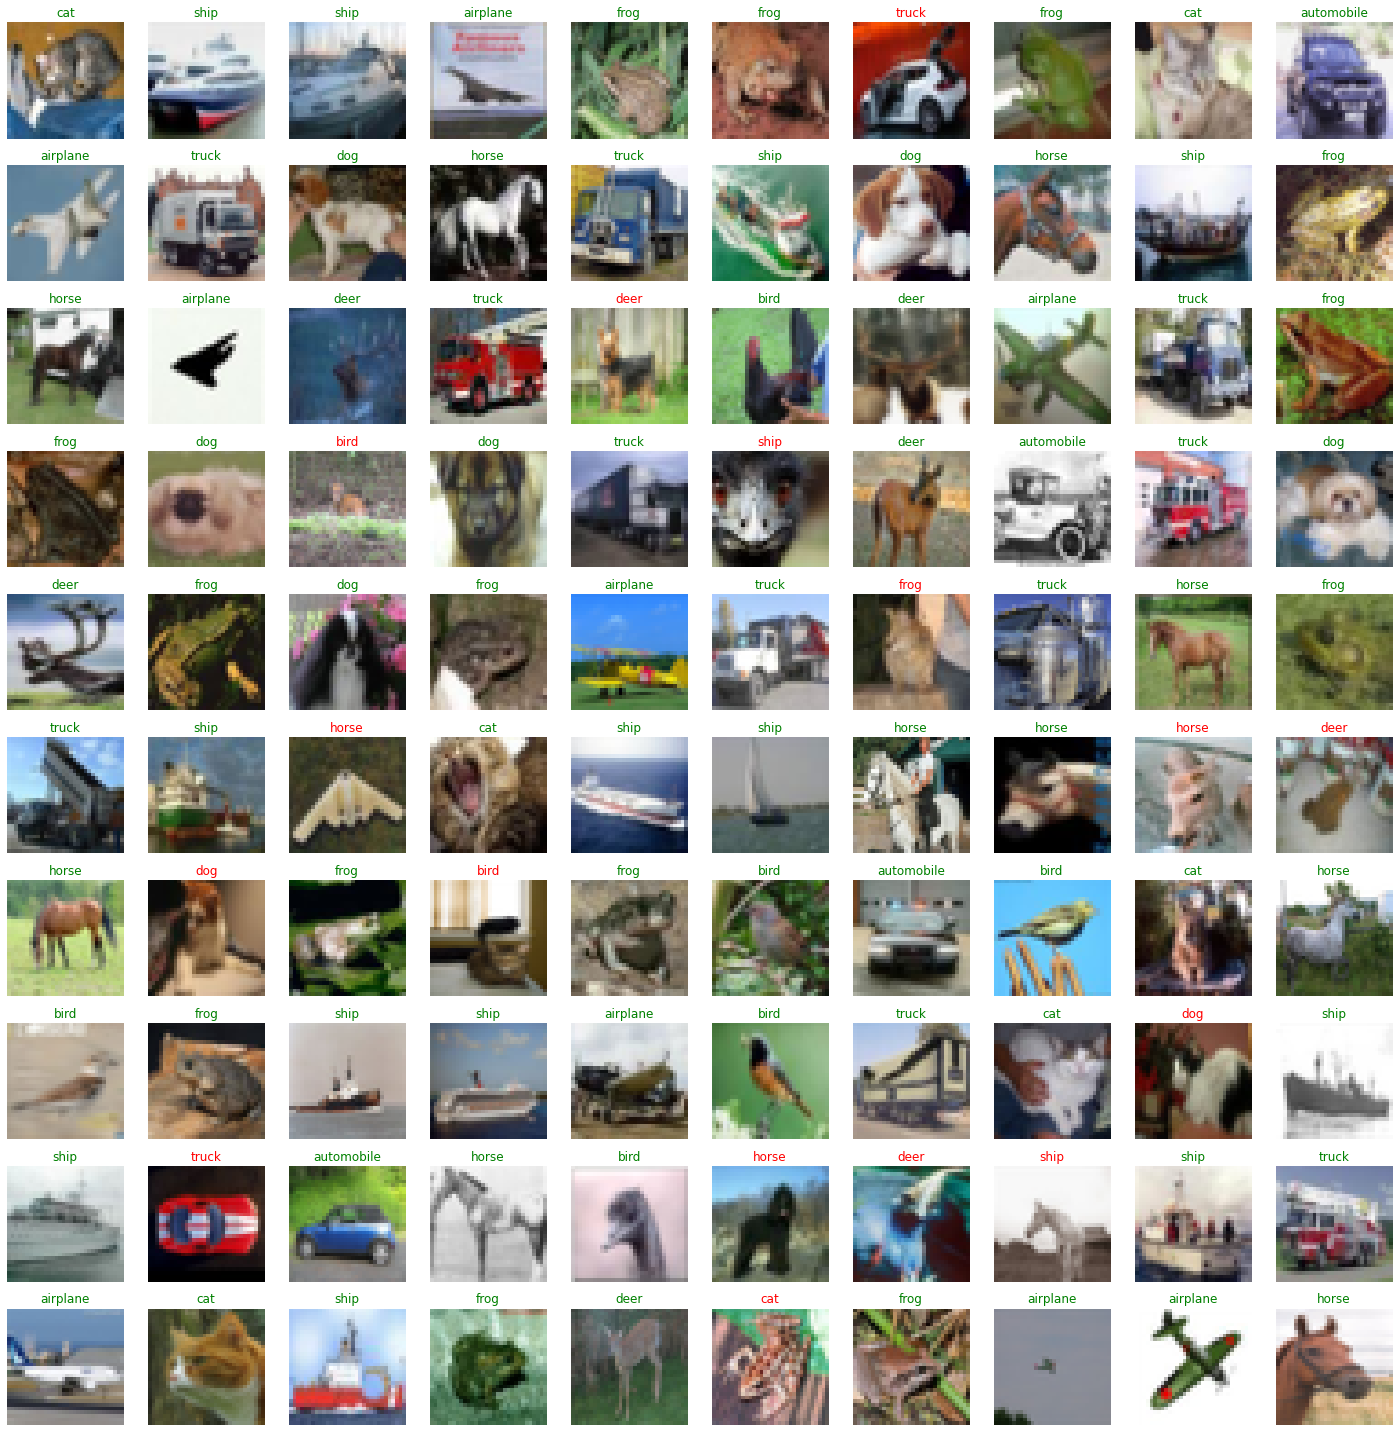

In [ ]:
X_new = X_test[:100]  # X_test 이미지 100장 가져오기

y_proba = model_good1.predict(X_new)  # X_test 100장 이미지에 대한 예측 및 확률 값 출력

y_pred = np.argmax(model_good1.predict(X_new), axis = -1)   # 각 줄당 max값 출력

y_new = y_test[:100]

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(20,20))
for index, image in enumerate(X_new):
    plt.subplot(10,10, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")   # interpolation = 'nearest' : 해상도 증가
    plt.axis('off')
    plt.title(class_names[y_pred.flatten()[index]], 
              color = 'green' if y_pred.flatten()[index] == y_new.flatten()[index] else 'red')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.tight_layout()
plt.show()